# Task -02

 `Introduction`
- The Titanic dataset provides insight into the factors that affected passenger survival during the tragic sinking of the RMS Titanic in 1912. Analyzing this dataset allows us to understand the impact of various demographic factors such as age, sex, class, and embarkation port on survival rates.

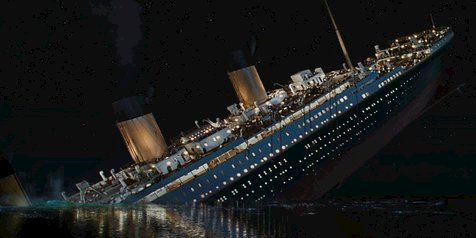

In [88]:
from IPython.display import Image

# Display the image with specified width and height
Image(r"C:\Users\Admin\Desktop\Titanic.jpeg", width=1000, height=400)

###  Data cleaning and Explorartory Data Anaylisis

###  Data Cleaning

####  Import  libraries

In [89]:
#type:ignore 
import pandas as pd                    # for data manipulation and analysis
import numpy as np                     # for numerical operations and array manipulation
import seaborn as sns                  # for statistical data visualization
import matplotlib.pyplot as plt        # for creating visualizations
from scipy.stats import norm           # Statistical functions and distributions 
import warnings                        # For handling warnings in the code
warnings.filterwarnings("ignore")      # Ignore all warnings
from scipy import stats                # Statistical tests and functions

#### Load the Titanic dataset

In [90]:
# Load the Titanic dataset
Titanic = pd.read_excel("Titanic Data_set.xls")
Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


#### Code Description
---
- The `Titanic.head()`function displays the first five rows of the dataset, giving a quick overview of the data structure and the initial values in each column.
---

#### Understanding the dataset

In [91]:
#type:ignore
# Check the basic info of the dataset
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


#### Code Description
The `Titanic.info()` function provides a summary of the dataset, including:
- The number of entries
- Column names
- Data types
- Non-null values

#### Titanic Dataset Column Descriptions
---
- **Survived**: Indicates whether the passenger survived (1) or did not survive (0).
- **Pclass**: The passenger's ticket class (1 = first class, 2 = second class, 3 = third class).
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Age**: The age of the passenger in years.
- **SibSp**: The number of siblings or spouses the passenger had on board.
- **Parch**: The number of parents or children the passenger had on board.
- **Ticket**: The ticket number of the passenger.
- **Fare**: The fare paid by the passenger for the ticket, in British pounds. This reflects the travel class and amenities, influencing survival chances; higher fares often indicated first-class accommodations.
- **Cabin**: The cabin number assigned to the passenger, indicating their location on the ship. Cabin location played a role in access to lifeboats during the evacuation, affecting survival rates.
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
---

#### `Explanation of the Steps`
---
- Checking for duplicates is done first to ensure the dataset's integrity before any further processing, as duplicates can skew analysis results.
- Next, verifying data types ensures that each column is correctly formatted for the intended operations, facilitating accurate calculations and analyses.
- Finally, filling missing values addresses gaps in the data to maintain completeness and reliability in the dataset, ensuring more robust analysis outcomes.
---

#### Preview of the Titanic Dataset

In [93]:
Titanic.describe()    # understanding the data set

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [94]:
# Renaming of each column name
Titanic.columns = Titanic.columns.str.capitalize()

# Verify the changes
print("\nColumn names after renaming:")
print(Titanic.columns)



Column names after renaming:
Index(['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Check for Duplicates

In [95]:
# Check for duplicates
duplicates = Titanic.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


##### Code Description
---
- `Titanic.duplicated().sum()` This code checks for duplicate entries in the Titanic DataFrame by identifying rows that are identical and counts them, outputting the total number of duplicates.
---

#### Droping unnessary columnun

In [96]:
# Check data types
print("Data types")
Titanic.dtypes

Data types


Pclass        int64
Survived      int64
Name         object
Sex          object
Age         float64
Sibsp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#####  Transforming to convenient data types

In [ ]:
# Specifying the columns to convert
cols = ['Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ,'Survived' ]

# Converting the specified columns to categorical types
for col in cols:
    Titanic[col] = Titanic[col].astype('category')

# Check the data types to confirm the changes
print("\nData types after conversion:")
print(Titanic.dtypes)


Data types after conversion:
Pclass      category
Survived    category
Name        category
Sex         category
Age          float64
Sibsp          int64
Parch          int64
Ticket      category
Fare         float64
Cabin       category
Embarked    category
dtype: object


##### Code Description
---
- This code snippet converts specified columns in the Titanic DataFrame to categorical data types. To enhance the performance of data analysis tasks. The columns being converted are:

-**Name**: The full name of the passenger.

-**Sex**: The gender of the passenger (male or female).

-**Ticket**: The ticket number of the passenger.

-**Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


##### Code Description
---
- This code changes the data type of the **PassengerId** column to a string (object) type, preserving leading zeros and treating it as a categorical variable rather than a numerical one, to and avoid mathematical operations that are unnecessary for identifiers.
--- 

In [98]:
Titanic.dtypes

Pclass      category
Survived    category
Name        category
Sex         category
Age          float64
Sibsp          int64
Parch          int64
Ticket      category
Fare         float64
Cabin       category
Embarked    category
dtype: object

#### Check for Missing Values

In [99]:
Titanic.isnull().sum()

Pclass         0
Survived       0
Name           0
Sex            0
Age          263
Sibsp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

##### Code description
---

**`Titanic`**: The dataset containing information about the Titanic passengers.

**`.isnull()`**: This function checks for missing values, returning `True` for missing (null) entries and `False` for present values.

**`.sum()`**: This function counts the number of `True` values (missing entries) in each column, effectively tallying the missing values.

--- 
##### Output Analysis

The columns **Survived**, **Pclass**, **Name**, **Sex**, **SibSp**, and **Ticket** have no missing values, indicating complete data.

In contrast, the **Age**, **Cabin**, and **Embarked** columns contain missing values, which need to be addressed for thorough analysis.





### Handling  Missing Values

#####  Age coloumun and Fare coloumun

In [ ]:
# Drop rows where 'Age' and 'Fare' has missing values
Titanic = Titanic.dropna(subset=['Age'])

# Reset index after dropping rows, to ensure a clean, sequential index
Titanic.reset_index(drop=True, inplace=True)

#### Explanation:

- dropna(subset=['Age'], inplace=True):

- Removes rows where Age is NaN, updating the DataFrame in place.
reset_index(drop=True, inplace=True):

---
- reset_index(drop=True, inplace=True):

- Resets the index so that it starts from 0 after dropping rows.

- The drop=True parameter ensures the old index column is not added as a new column.
print(Titanic.head()):

Displays the first few rows to confirm the changes.

---

##### Using Mode (Most Frequent Value):

In [101]:
# Fill missing values in the 'Fare' column by grouping based on 'Pclass' and using the mode
Titanic['Fare'] = Titanic.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mode()[0]))

#### Explanation:
- Grouping by Pclass:Groups the dataset by Pclass.

- Transform() with fillna():Uses the mode of each Pclass to fill missing Fare values.

In [102]:
# # Fill missing values in the Embarked column with the mode
mode_embarked = Titanic['Embarked'].mode()[0]  # Get the first mode if there are multiple
Titanic['Embarked'] = Titanic['Embarked'].fillna(mode_embarked)

##### Code description
---
- The code computes the mode of the **Embarked** column using the `mode()` function, which identifies the most frequently occurring embarkation point. It then uses fillna() to replace any missing values in the Embarked column with this mode value and assigns the result back to the original column in the DataFrame, effectively updating it without needing inplace=True.

- The mode is used for the **Embarked** column is catagorical data because it reflects the most common embarkation point among passengers. This method preserves the dataset's overall distribution and ensures that the imputed values accurately represent the majority experience of the passengers.
---


##### Filling missing values of `Cabin column`
- Filling missing values for the `Cabin column` in the Titanic dataset can be approached in a few ways, but given that a significant portion is missing, it's important to to drop the columun instead.
---

##### Dropping the Column

In [103]:
#Since  the  data have a significant number of missing values 
Titanic.drop(columns=['Cabin'], inplace=True)   

###  Handling Outliers by lower bound and upper bound

In [104]:
# Function to identify outliers using IQR
numerical_cols = ['Age', 'Fare','Parch','Sibsp']

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

# Identify outliers for 'Age', 'SibSp', 'Fare', and 'Parch'
print("{:<10} {:<20}{:<20}{:<20}".format("Column", "Lower Bound", "Upper Bound", "Outlier Count"))
print("=" * 70)

for col in    ['Age', 'Fare','Parch','Sibsp']:
    lower, upper = identify_outliers_iqr(Titanic, col)
    
    # Count outliers
    outlier_count = Titanic[(Titanic[col] < lower) | (Titanic[col] > upper)].shape[0]
    
    # Print results in neat format
    print("{:<10} {:<20} {:<20} {:<20}".format(col, round(lower, 2), round(upper, 2), outlier_count))

Column     Lower Bound         Upper Bound         Outlier Count       
Age        -6.0                 66.0                 9                   
Fare       -33.12               76.68                131                 
Parch      -1.5                 2.5                  21                  
Sibsp      -1.5                 2.5                  45                  


##### Explanation of Outlier Detection Code
---

 **Function Definition**:
   - The `identify_outliers_iqr` function computes the lower and upper bounds for outliers based on the first (Q1) and third (Q3) quartiles. 
   - The formula used for this calculation is:
     \[
     \text{IQR} = Q3 - Q1
     \]
   - Outliers are defined as values that fall below \( Q1 - 1.5 *{IQR} \) or above \( Q3 + 1.5 \*{IQR} \).
   
**Looping Through Columns**:
   - The code iterates through each specified column (Age, Fare, Parch, and SibSp).
   - For each column, it:
     - Calculates the lower and upper bounds for outliers.
     - Counts the number of outliers that fall outside of these bounds.
     - Prints the results in an organized format, showing the column name, lower bound, upper bound, and the count of outliers.

##### Purpose
---
This method of outlier detection is essential for understanding the distribution of data and identifying anomalies within the dataset. Detecting and addressing outliers can improve the quality of data analysis and modeling.

---


##### Capping Outliers  Using IQR Method

In [105]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of columns to cap
columns_to_cap = ['Age', 'Fare','Parch','Sibsp']

# Apply capping for each specified column
for col in columns_to_cap:
    cap_outliers_iqr(Titanic, col)

##### Explanation of the Code

- The function `cap_outliers_iqr` is designed to cap outliers in a specified DataFrame column.
- It calculates the first quartile (Q1) and third quartile (Q3) to determine the interquartile range (IQR).
- Lower and upper bounds for outliers are set using \( Q1 - 1.5 * {IQR} \) and \( Q3 + 1.5 * {IQR} \).
- The function uses the `clip()` method to cap values that fall below or above these bounds.
- A list of columns ('Age', 'SibSp', 'Fare', 'Parch') is specified, and the capping function is applied to each of them.



##### Counting Outliers After Capping in the Dataset Using IQR Method

In [106]:
for col in columns_to_cap:
    lower, upper = identify_outliers_iqr(Titanic, col)
    
    # Count outliers after capping
    outlier_count_after = Titanic[(Titanic[col] < lower) | (Titanic[col] > upper)].shape[0]
    
    # Print results for outliers after capping
    print("{:<10}  {:<20}".format(col, outlier_count_after))

Age         0                   
Fare        0                   
Parch       0                   
Sibsp       0                   


### Code Explanation

- The loop iterates over each column specified in `columns_to_cap`.
- For each column, it calls the `identify_outliers_iqr` function to retrieve the lower and upper bounds for outliers.
- It counts the number of outliers that remain after capping by checking which values fall outside the determined bounds.
- Finally, it prints the number of outliers that are present in each column after the capping operation.



##### Rearranging Titanic DataFrame Columns for Improved Clarity

In [107]:
# Rearranging the columns as per your specified order
new_order = ['Name', 'Sex', 'Age', 'Pclass', 'Sibsp', 'Parch', 'Embarked','Ticket','Fare','Survived']

# Reindex the DataFrame in place
Titanic = Titanic.reindex(columns=new_order)

# Display the rearranged DataFrame structure
Titanic.head()


,Name,Sex,Age,Pclass,Sibsp,Parch,Embarked,Ticket,Fare,Survived
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,0.0,0.0,S,24160,76.675,1
1,"Allison, Master. Hudson Trevor",male,0.9167,1,1.0,2.0,S,113781,76.675,1
2,"Allison, Miss. Helen Loraine",female,2.0000,1,1.0,2.0,S,113781,76.675,0
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,1.0,2.0,S,113781,76.675,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,1.0,2.0,S,113781,76.675,0


##### Lets check before performing any anaylis

In [108]:
# Display the updated DataFrame info
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      1046 non-null   category
 1   Sex       1046 non-null   category
 2   Age       1046 non-null   float64 
 3   Pclass    1046 non-null   category
 4   Sibsp     1046 non-null   float64 
 5   Parch     1046 non-null   float64 
 6   Embarked  1046 non-null   category
 7   Ticket    1046 non-null   category
 8   Fare      1046 non-null   float64 
 9   Survived  1046 non-null   category
dtypes: category(6), float64(4)
memory usage: 123.6 KB


## Exploratory Data Analysis (EDA)

##### Summary Stastics

In [109]:
# Get statistical summary of numerical columns
#  code to clean and convert fractional values in SibSp and Parch
Titanic['Sibsp'] = Titanic['Sibsp'].apply(lambda x: round(x) if x.is_integer() else int(x))
Titanic['Parch'] = Titanic['Parch'].apply(lambda x: round(x) if x.is_integer() else int(x))

numerical_summary = round(Titanic.describe(),2)
numerical_summary

,Age,Sibsp,Parch,Fare
count,1046.00,1046.00,1046.00,1046.00
mean,29.83,0.42,0.38,27.38
std,14.26,0.63,0.68,24.07
min,0.17,0.00,0.00,0.00
25%,21.00,0.00,0.00,8.05
50%,28.00,0.00,0.00,15.75
75%,39.00,1.00,1.00,35.50
max,66.00,2.00,2.00,76.68


In [110]:
### for better clarirty
numerical_summary.transpose() # Transpose for easier reading

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.83,14.26,0.17,21.00,28.00,39.0,66.00
Sibsp,1046.0,0.42,0.63,0.00,0.00,0.00,1.0,2.00
Parch,1046.0,0.38,0.68,0.00,0.00,0.00,1.0,2.00
Fare,1046.0,27.38,24.07,0.00,8.05,15.75,35.5,76.68


### Interpretation of Summary Statistics
---

#####  **Age:**
   - **Count:** There are 1046 entries for age.
   - **Mean:** The average age of passengers is approximately 29.38 years.
   - **Standard Deviation:** The age of passengers varies with a standard deviation of 12.06 years, indicating a moderate spread of ages around the mean.
   - **Minimum and Maximum:** The youngest passenger is `0.17` years old, while the oldest is `66` years, suggesting a diverse age range among the passengers.
   - **Percentiles:** 
     - 25% of passengers are aged `21 `or younger.
     - 50% (the median) are `28` years or younger, indicating that half the passengers are under this age.
     - 75% of passengers are aged `39` or younger.

#####  **SibSp (Siblings/Spouses Aboard):**
   
   - **Mean:** On average, passengers had approximately `0.42 `siblings/spouses aboard, indicating that most passengers traveled alone or with very few family members.
   - **Standard Deviation:** The standard deviation of `0.63` suggests that while many passengers had none, a few had more than one sibling or spouse aboard.
   - **Minimum and Maximum:** The minimum value is 0 (no siblings/spouses), and the maximum is 2, which indicates a potential anomaly since fractional counts typically do not apply in this context.
   - **Percentiles:** 
     - 25% of passengers had no siblings/spouses aboard.
     - 50% of passengers (the median) also had no siblings/spouses.
     - 75% of passengers had one sibling/spouse aboard.

#####  **Parch (Parents/Children Aboard):**
   
   - **Mean:** The average number of parents/children aboard is  `0.38`, indicating that most passengers were traveling without children or parents.
   - **Standard Deviation:** A standard deviation of 0.68  suggests that there was no variability in this column; essentially, the values for all passengers were either 0 or possibly undefined due to the lack of any entries for parents or children.
   - **Minimum and Maximum:** The minimum is 0 (no parents/children), and the maximum is also 2, confirming that most passengers had no  parents or children with them.
   - **Percentiles:** 
     - Most  percentiles are 0, reinforcing that most passengers traveled alone.
     - Some children  may have travelled  with  parents.

#####  **Fare:**
   
   - **Mean:** The average fare paid by passengers is approximately `27.78`.
   - **Standard Deviation:** The standard deviation of `24.07` indicates significant variation in fares paid by passengers, reflecting a diverse economic background.
   - **Minimum and Maximum:** The minimum fare is 0.00, possibly indicating either a fare exemption or an entry error, while the maximum fare is 76.68, representing the highest fare paid by any passenger.
   - **Percentiles:**
     - 25% of passengers paid 8.05 or less.
     - 50% (the median) paid 15.75 or less.
     - 75% of passengers paid 35.50 or less.

##### for Addressing Fractional Values
- In conclusion, while the dataset provides insightful statistics about the passengers, addressing the anomalies related to fractional values is crucial for ensuring the quality and reliability of any subsequent analyses.
##### Conclusion

The data suggests that the passengers represented a **diverse age range**, implying that people of various ages were traveling. Additionally, the fact that the **average number of parents or children aboard is 0.68** indicates that most passengers were traveling alone, without family members. This pattern may reflect that the passengers were primarily **independent travelers**, possibly traveling for reasons such as business or leisure, rather than family trips.

Furthermore, the **diverse economic backgrounds** of the passengers could explain why different types of individuals—whether young, old, single, or in groups—were on board, suggesting that the mode of travel was accessible to a wide range of social and economic classes.

---

##### Summary stastics for Catagorical columun

In [111]:
# Specify the columns to summarize
summary_columns = ['Sex', 'Pclass', 'Embarked', 'Survived']

# Generate summary statistics for the specified categorical columns
categorical_summary = {}
for column in summary_columns:
    categorical_summary[column] = Titanic[column].value_counts()

# Print the summary in a clear format
print("\n### Categorical Summary Statistics:")
for column, counts in categorical_summary.items():
    print(f"\n{column} Summary:")
    for value, count in counts.items():
        print(f"{value}: {count}")


### Categorical Summary Statistics:

Sex Summary:
male: 658
female: 388

Pclass Summary:
3: 501
1: 284
2: 261

Embarked Summary:
S: 784
C: 212
Q: 50

Survived Summary:
0: 619
1: 427


###  Visualization of Titanic Dataset

##### How many survived?

In [112]:
# Filter the DataFrame for survived passengers
titanic_survived = Titanic[Titanic['Survived'] == 1]

# Get the number of survived passengers
num_survived = len(titanic_survived)

# Print the number of survived passengers
print(f'The num_survive of passenger  is {num_survived}')

The num_survive of passenger  is 427


##### Bar garph of Survival of passengers  status by `Sex`

In [113]:
# Group by 'Sex' and 'Survived' and count occurrences, explicitly setting observed=False
survival_counts = Titanic.groupby(['Sex', 'Survived'], observed=False).size().unstack(fill_value=0)

# Display the result
survival_counts


Survived,0,1
Sex,,
female,96,292
male,523,135


##### Intepretation: 
- **0** represents not survived 
- **1** represents survived

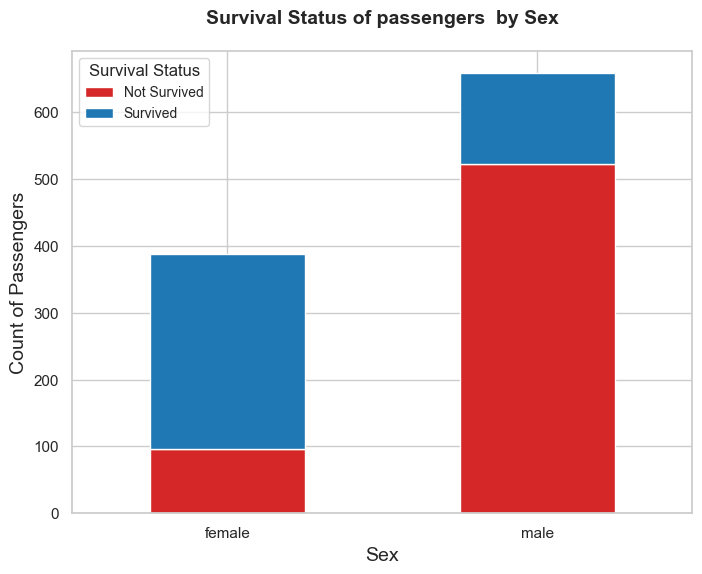

In [114]:
# 'Titanic' is  DataFrame and contains 'Survived' and 'Sex' columns
# Set plot style and size
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot with custom colors and labels
survival_counts.plot(kind='bar', stacked=True, color=["#d62728", "#1f77b4"], ax=plt.gca())


# Customize labels and title

plt.title('Survival Status of passengers  by Sex', fontsize=14, weight='bold', pad=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count of Passengers', fontsize=14)

# Customize legend
plt.xticks(rotation=0)
plt.legend(
    title='Survival Status',
    labels=['Not Survived', 'Survived'],
    loc='upper left',
    fontsize=10,
    title_fontsize=12
)
# Show plot
plt.show()


#### Interpretation
- The graph titled "Survival Status of Passengers by Sex" shows the distribution of survival and non-survival among male and female passengers.

- **Survival Rate:**
    - **Females:** Approximately 292 out of 388 females survived, indicating a higher survival rate.
    - **Males:** Approximately 135 out of 658  males survived, indicating a lower survival rate.

- **Non-Survival Rate:**
    - **Females:** Approximately 92 out of 388 females did not survive.
    - **Males:** Approximately 523  out of 658 males did not survive.

- **Overall:**
    - The chart suggests that females had a significantly higher chance of survival compared to males on this particular journey, due to several factors such as the `"Female First protocol."`


##### Bar garph of Survival of passengers  status by `Pclass`

In [115]:
# Group the data by 'Pclass' and 'Survived' and count the occurrences
survival_counts_1 = Titanic.groupby(['Pclass', 'Survived'],observed=False).size().unstack(fill_value=0)
survival_counts_1


Survived,0,1
Pclass,,
1,103,181
2,146,115
3,370,131


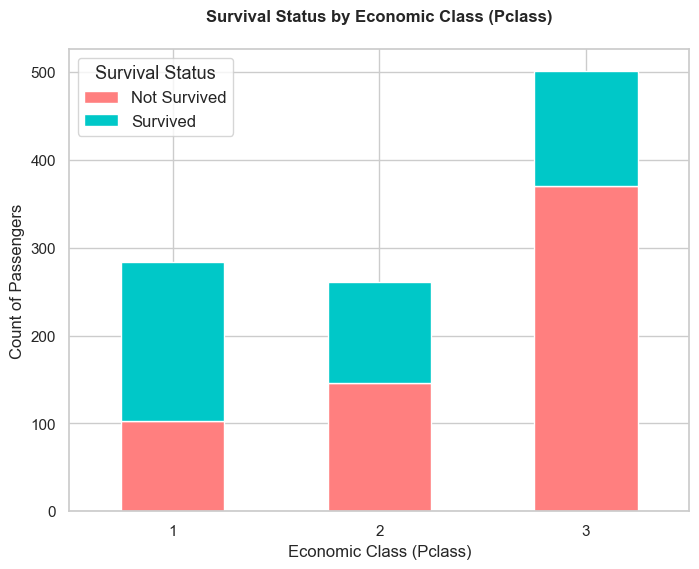

In [150]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))

# Create the stacked bar chart
survival_counts_1.plot(kind='bar', stacked=True, color=['#FF7F7F', '#00C8C8'], ax=plt.gca())

# Customizing the plot
plt.title('Survival Status by Economic Class (Pclass)', fontsize=12, weight='bold', pad=20)
plt.xlabel('Economic Class (Pclass)', fontsize=12)
plt.ylabel('Count of Passengers', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels to be horizontal
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'], fontsize=12, title_fontsize=13)

# Show plot
plt.show()


##### Interpretation

<<div align="center">

<table style="width: 50%; margin: auto;">
    <tr>
        <th>Class</th>
        <th>Not Survived</th>
        <th>Survived</th>
        <th>Total</th>
        <th>Survival Rate (%)</th>
    </tr>
    <tr>
        <td>1</td>
        <td>103</td>
        <td>181</td>
        <td>284</td>
        <td>63.7%</td>
    </tr>
    <tr>
        <td>2</td>
        <td>146</td>
        <td>115</td>
        <td>261</td>
        <td>44.1%</td>
    </tr>
    <tr>
        <td>3</td>
        <td>370</td>
        <td>131</td>
        <td>501</td>
        <td>26.1%</td>
    </tr>
</table>

</div>


The graph visually represents the stark disparity in survival rates among different economic classes on the Titanic.


-  **Class Disparity:**
   - **Class 1:** Passengers in the first class had the highest survival rate, with over 63.7% surviving the disaster.
   - **Class 2:** While still higher than the lowest class, the survival rate for second-class passengers was significantly lower, at approximately 44.1%.
   - **Class 3:** Passengers in the third class had the lowest survival rate, with only about 26.1% surviving the disaster.
   
`Note that ; the percentage representation is in relative at  each classlevel in comparsion to the class total`
- **Factors Influencing Survival:**
   - **Location on the Ship:** The location of cabins and access to lifeboats were crucial factors. First-class passengers were often located on higher decks, closer to lifeboats, and had quicker access to them.
   
   - **Physical Barriers:** Physical barriers, such as locked gates and crowded decks, may have hindered the escape of lower-class passengers.

- The data also shown that most of the survived passengers are from the Upper Class (284 people). But to be precise, from the calculation of survival rate ratio of each classes, it also shown that the Upper Class gets more than 63.7% survival rate, and the Lower Class only got 26.1% of survival rate.

- In conclusion, the graph clearly illustrates the stark inequality in survival chances based on economic class. This tragic event highlights the social and economic disparities of the time and the impact of these disparities on human life.


#### Pie chart of Embarkment of Titanic_Dataset

In [117]:
# Summarize the data to get the count of passengers for each embarkation port
embarkation_counts = Titanic['Embarked'].value_counts()

# Display the results
embarkation_counts

Embarked
S    784
C    212
Q     50
Name: count, dtype: int64

`This indicates that:`

- 784 passengers embarked from Southampton ('S').
- 212 passengers embarked from Cherbourg ('C').
- 50 passengers embarked from Queenstown ('Q').

In [118]:
# Convert to DataFrame for better presentation
embarkation_counts_df = embarkation_counts.reset_index()
embarkation_counts_df.columns = ['Embarkation Port', 'Passenger Count']

# Display the DataFrame
embarkation_counts_df

,Embarkation Port,Passenger Count
0,S,784
1,C,212
2,Q,50


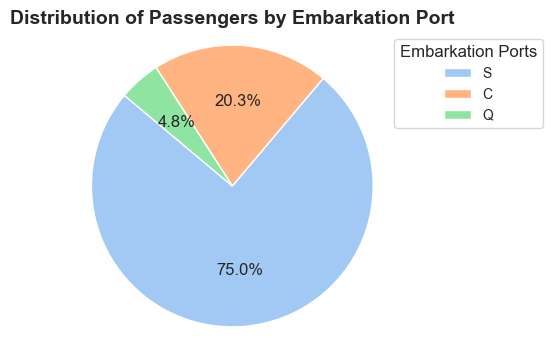

In [119]:
# Create the pie chart using Matplotlib
plt.figure(figsize=(4, 4))

# Define colors using a Seaborn color palette
colors = sns.color_palette("pastel")

# Create the pie chart without labels on slices
plt.pie(embarkation_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Title
plt.title('Distribution of Passengers by Embarkation Port', fontsize=14, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a custom legend
# Adding the legend to the upper left corner
plt.legend(
    labels=embarkation_counts.index,
    title="Embarkation Ports",
    loc='upper left',
    bbox_to_anchor=(1, 1),  # Adjust the position of the legend
    fontsize=10,
    title_fontsize=12,
    facecolor='white'
)

# Show the plot
plt.show()

#### `Distribution of Passengers by Embarkation Port`
---

##### illustrates the proportion of passengers who embarked from different ports:

- **Southampton (S)**: The largest proportion of passengers (72.0%) boarded the ship in Southampton.
- **Cherbourg (C)**: Approximately 20.3% of passengers embarked from Cherbourg.
- **Queenstown (Q)**: The smallest proportion of passengers (4.8%) boarded in Queenstown.

### Interpretation:

The chart indicates that **Southampton** was the primary embarkation port for the majority of passengers on the ship. **Cherbourg** had a significant number of passengers as well, while **Queenstown** had the fewest. This information can be useful for understanding the geographical distribution of passengers and potentially other aspects of the ship's journey.

--- 


##### How survival rate was affected by Embarkment

In [120]:
# Get a summary of the 'Embarked' column
embarked_summary = titanic_survived['Embarked'].value_counts()

# Print the summary
print(embarked_summary)

Embarked
S    282
C    132
Q     13
Name: count, dtype: int64


##### Cherbourg

In [121]:
# Given values
survivors_C = 93
total_passengers_C = 168

# Calculate the survival ratio
ratio_C = round((survivors_C / total_passengers_C) * 100,2)
ratio_C

55.36

##### Queenstown

In [122]:
# Given values
survivors_Q = 30
total_passengers_Q = 77

# Calculate the survival ratio
ratio_Q = round((survivors_Q / total_passengers_Q) * 100,2)
ratio_Q


38.96

##### Southampton

In [123]:
# Given values
survivors_S = 217
total_passengers_S = 644

# Calculate the survival ratio
ratio_S = round((survivors_S / total_passengers_S) * 100,2)
ratio_S

33.7

### Interpretation of Survival Rate by Port of Embarkation
---

`**Cherbourg**`: Passengers who embarked from Cherbourg had the highest survival rate (55.36%). 

`**Queenstown**`: Passengers from Queenstown had a lower survival rate (38.96%)

`**Southampton**`: Passengers from Southampton had the lowest survival rate (33.70%). 

---

### Possible Factors Influencing Survival

- **Socioeconomic Status**
---

### Further Analysis

To gain a deeper understanding of the factors influencing survival rates, it would be beneficial to consider additional variables:

- **Age and Gender**: How did age and gender affect survival rates for passengers from different ports?

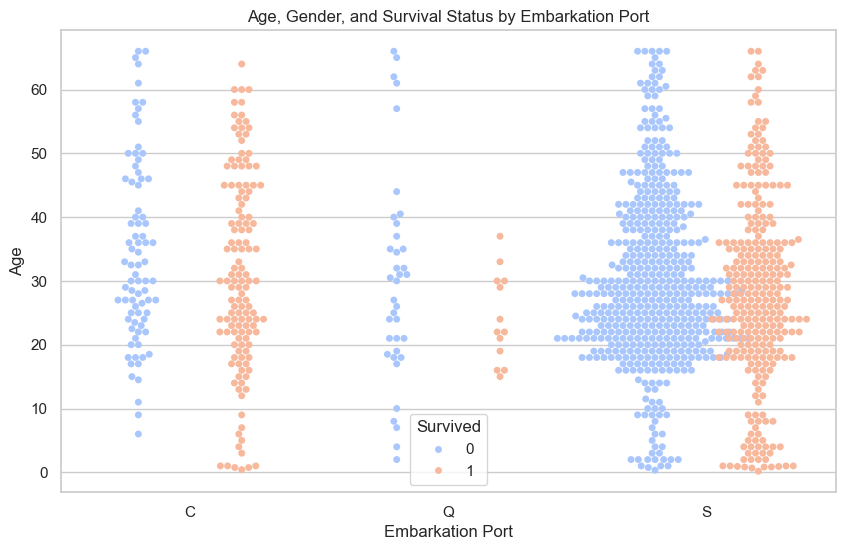

In [124]:
warnings.filterwarnings("ignore")
# Swarm plot for Age, Gender, and Survival Status by Port
plt.figure(figsize=(10, 6))
sns.swarmplot(data=Titanic, x='Embarked', y='Age', hue='Survived', palette='coolwarm', dodge=True)
plt.title("Age, Gender, and Survival Status by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Age")
plt.legend(title='Survived')
plt.show()


`The  Age, Gender, and Survival Status by Embarkation Port`

- This graph illustrates how age, gender, and embarkation port (Cherbourg, Queenstown, Southampton) influenced survival outcomes for Titanic passengers.
---

- **Age Distribution**:
  - **Cherbourg** (C): Passengers were generally older and had a broader age range.
  - **Queenstown** (Q): Passengers were younger, with less age variability.
  - **Southampton** (S): Mixed ages, with a notable number of young and middle-aged passengers.

- **Survival Rates**:
  - **Cherbourg**: Higher survival rates, especially among younger passengers.
  - **Queenstown**: Lower survival, particularly for older individuals.
  - **Southampton**: Mixed survival rates, with both young and older passengers affected.

- **Gender Influence**:
  - **Female**: Higher survival rates in all ports, especially among younger women.
  - **Male**: Lower survival rates, particularly older males from Queenstown and Southampton.

#### Possible Explanations:
Factors such as **socioeconomic status** (likely higher among Cherbourg passengers),

#### Conclusion:
This analysis highlights how demographics and embarkation port influenced survival, shedding light on the factors that shaped passenger outcomes on the Titanic.

---


##### Analyzing the Impact of Class and Port on Survival Rates

In [125]:
# Ensure 'Survived' column is numeric (converts non-numeric to NaN, if any)
Titanic['Survived'] = pd.to_numeric(Titanic['Survived'], errors='coerce')

# Drop rows with NaN in 'Survived', 'Pclass', or 'Embarked' if they exist
Titanic.dropna(subset=['Survived', 'Pclass', 'Embarked'], inplace=True)

# Calculate the average survival by class and embarkation port
survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()

# Rename the 'Survived' column to 'Average_Survival_Rate'
survival_summary.rename(columns={'Survived': 'Average_Survival_Rate'}, inplace=True)

# Display the summary
print(survival_summary)

# Pivot the DataFrame to create a matrix for the heatmap
pivot_table = survival_summary.pivot(index="Pclass", columns="Embarked", values="Average_Survival_Rate")


  Pclass Embarked  Average_Survival_Rate
0      1        C               0.695312
1      1        Q               0.666667
2      1        S               0.588235
3      2        C               0.625000
4      2        Q               0.200000
5      2        S               0.426724
6      3        C               0.466667
7      3        Q               0.238095
8      3        S               0.233083


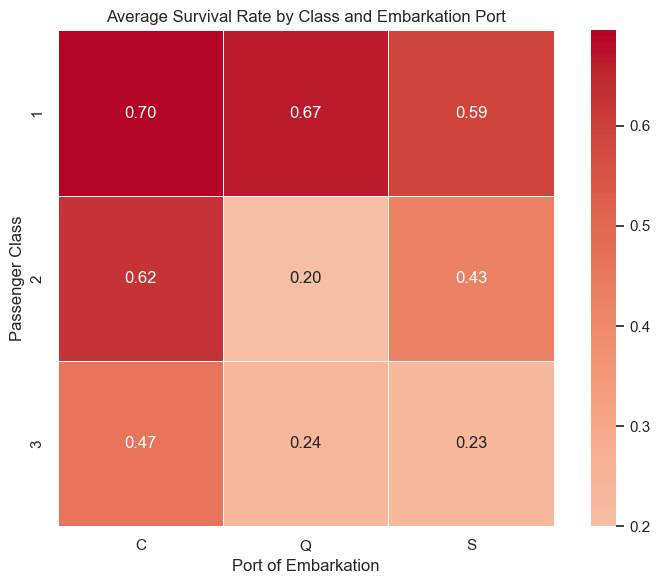

In [126]:
# Calculate average survival by class and embarkation port
survival_summary = Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()

# Rename the 'Survived' column to 'Average_Survival_Rate'
survival_summary.rename(columns={'Survived': 'Average_Survival_Rate'}, inplace=True)

# Pivot the DataFrame to create a matrix for heatmap
pivot_table = survival_summary.pivot(index="Pclass", columns="Embarked", values="Average_Survival_Rate")

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, square=True)
plt.title("Average Survival Rate by Class and Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Class")
plt.tight_layout()
plt.show()


`Understanding the Heatmap`

---

- This heatmap visualizes the average survival rate of passengers on the Titanic, categorized by their passenger class and port of embarkation. The color intensity represents the survival rate, with darker shades indicating higher survival rates.

##### Key Observations:

- Pclass: Passengers in Pclass 1 had the highest survival rates, followed by Pclass 2, and then Pclass 3. This aligns with the general trend observed in the Titanic disaster, where higher-class passengers had a better chance of survival.


- Port of Embarkation: Embarkation Port C (Cherbourg) had the highest survival rates across all passenger classes, followed by Port S (Southampton) and Port Q (Queenstown). This suggests that passengers who embarked from Cherbourg might have had certain advantages that increased their chances of survival.
Inferences

Class and Embarkation Port: The combination of passenger class and port of embarkation had a significant impact on survival rates. Passengers in higher classes who embarked from Cherbourg had the highest chances of survival.n.

##### Possible Explanations:

- **Socioeconomic Status**: Passengers in higher classes (1 and 2) were likely wealthier and had better access to lifeboats and rescue efforts.
- **Location on the Ship**: The location of cabins and access to lifeboats played a crucial role. Passengers in higher-class cabins were often located on upper decks, closer to lifeboats.
- **Timing of Embarkation**: Passengers who embarked from Cherbourg and Queenstown might have had earlier access to lifeboats, while those from Southampton embarked later, potentially limiting their chances of survival.

##### In Conclusion:

The heatmap highlights the significant impact of passenger class and port of embarkation on survival rates. It underscores the social and economic disparities that existed on the Titanic and how these factors influenced the outcomes of the disaster.

---

###  Histogram of Age distribution of passengers  by Survival status

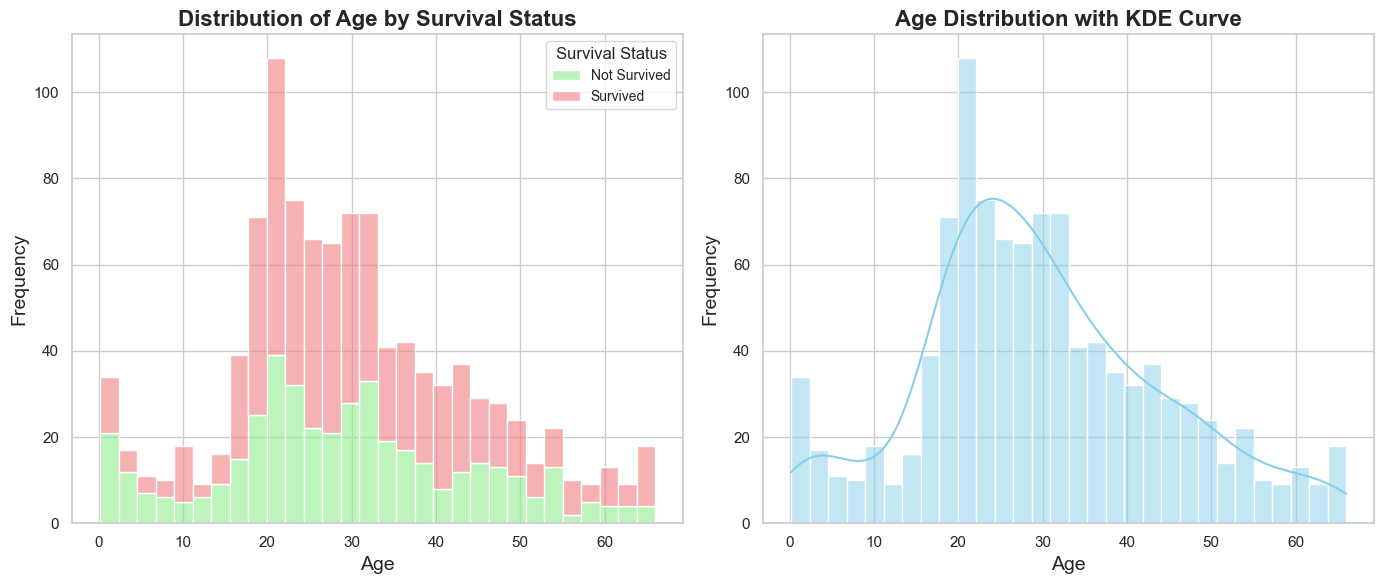

In [128]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Histogram with Survival Status hues
sns.histplot(data=Titanic, x='Age', hue='Survived', bins=30, 
             multiple='stack', palette=['lightcoral', 'lightgreen'], alpha=0.6, ax=axs[0])

# Customize labels and title for the histogram
axs[0].set_title("Distribution of Age by Survival Status", fontsize=16, weight='bold')
axs[0].set_xlabel("Age", fontsize=14)
axs[0].set_ylabel("Frequency", fontsize=14)
axs[0].legend(title='Survival Status', labels=['Not Survived', 'Survived'], fontsize=10)

# Plot 2: Simple Histogram with KDE
sns.histplot(Titanic['Age'], bins=30, kde=True, color='skyblue', ax=axs[1])

# Customize labels and title for the histogram with KDE
axs[1].set_title("Age Distribution with KDE Curve", fontsize=16, weight='bold')
axs[1].set_xlabel("Age", fontsize=14)
axs[1].set_ylabel("Frequency", fontsize=14)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.show()


##### `"Distribution of Age by Survival Status"`

- The histogram shows the distribution of passenger ages, categorized by their survival status (survived or not survived). It provides insights into how age influenced survival on the Titanic.

- **Age Distribution:** The graph reveals a wide range of ages among passengers, from infants to elderly individuals.
- **Survival Trends:**
  - **Children:** Younger passengers, especially children, had a higher survival rate. This is evident from the taller green bars in the younger age groups.
  - **Adults:** The middle-aged group (around 20-40 years old) had a lower survival rate, as indicated by the taller red bars in this range.
  - **Elderly:** Older passengers also had a lower survival rate, though this is less pronounced compared to the middle-aged group.

##### Explanations:
---
- shown that the mean of age of survival in the Titanic accident are around 29.70 years old. This could also happen because those mostly survived are female.
- **Social Factors:** Social norms and expectations might have influenced the order of evacuation, with women and children often being prioritized.

##### In Conclusion:

The graph suggests that age was a significant factor in determining survival on the Titanic. Younger passengers, particularly children, had a higher chance of survival, while middle-aged and older individuals were less likely to survive. These findings highlight the complex interplay between age, social factors, and physical attributes in shaping the outcome of the disaster.

---


##### Analyzing the Relationship Between Age and Passenger Class on the Titanic

             Age    Pclass
Age     1.000000 -0.409348
Pclass -0.409348  1.000000


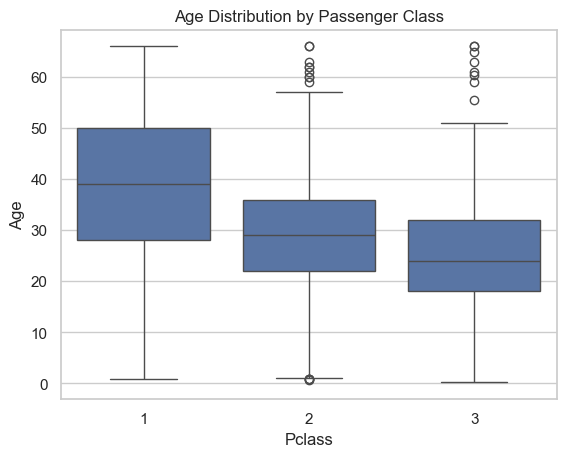

In [129]:
# Correlation Analysis
correlation_matrix = Titanic[['Age', 'Pclass']].corr()
print(correlation_matrix)


# Box Plot
sns.boxplot(x='Pclass', y='Age', data=Titanic)
plt.title('Age Distribution by Passenger Class')
plt.show()


#### Age Distribution by Passenger Class

The box plot displays the distribution of ages across three passenger classes (**Pclass**) on the Titanic. Each box represents the **interquartile range (IQR)** for a specific class, containing 50% of the data. The whiskers extend to the minimum and maximum values within **1.5 times the IQR**, and any points outside this range are considered outliers.

---

##### Interpretation:

##### **Median Age**:
- **Pclass 1**: The median age is around **38 years**.
- **Pclass 2**: The median age is around **28 years**.
- **Pclass 3**: The median age is around **25 years**.

---

##### **Range and Variability**:

- **Pclass 1**: 
  - The range of ages is wide, with a **minimum age** around **0** and a **maximum age** around **66**.
  - The IQR is relatively large, indicating **variability** in ages within this class.

- **Pclass 2**:
  - The range is narrower than Pclass 1, with a **minimum age** around **5** and a **maximum age** around **58**.
  - The IQR is smaller, suggesting **less variability** in ages compared to Pclass 1.

- **Pclass 3**:
  - The range is the smallest among the three classes, with a **minimum age** around **0** and a **maximum age** around **52**.
  - The IQR is also the smallest, indicating the **least variability** in ages.

---

##### **Outliers**:

- **Pclass 1**: 
  - There are a few outliers **above** the upper whisker, indicating some passengers in this class who were significantly **older** than the majority.
  
- **Pclass 2**: 
  - There are a few outliers **below** the lower whisker, suggesting some passengers in this class were significantly **younger** than the majority.
  
- **Pclass 3**: 
  - There are **no outliers** in this class.

---

##### **Inferences**:

 **Age Distribution**: 
   - The box plot suggests that the age distribution varies across passenger classes. **Pclass 1** had a **wider range** of ages, with a higher median age compared to **Pclass 2** and **3**. 
   - **Pclass 3** had the narrowest range of ages and the youngest median age.

 **Variability**: 
   - **Pclass 1** showed the **highest variability** in ages, while **Pclass 3** had the **least variability**.

 **Outliers**: 
   - The presence of outliers in **Pclass 1** and **2** indicates that some passengers in these classes were significantly **older** or **younger** than the majority.

---

**Note**: Without the exact numerical values, this interpretation is based on visual estimation from the box plot.


#####  Fare Distribution by Passenger Class on the Titanic

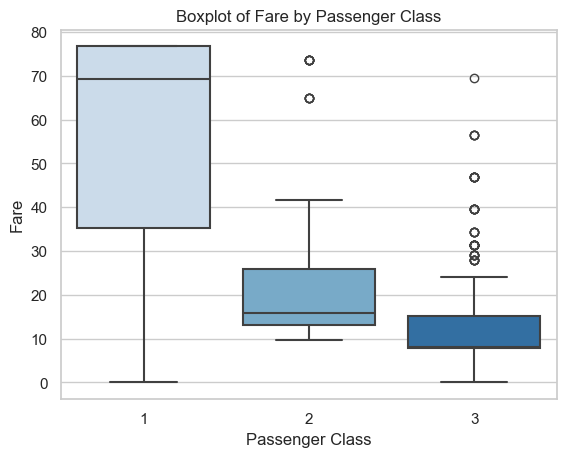

In [130]:
# Titanic DataFrame is defined
sns.boxplot(x='Pclass', y='Fare', data=Titanic, palette='Blues', linewidth=1.5, hue=None)

plt.title('Boxplot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


`The Boxplot of Fare by Passenger Class`

---
- The boxplot visually represents the distribution of fares across different passenger classes on the Titanic, highlighting central tendencies, spreads, and potential outliers.

##### Key Observations:

- **Median Fare:**
  - **1st Class:** Significantly higher median fare,around `£69`indicating substantial payments by most passengers.
  - **2nd Class:** around`£15` Lower median than first-class but higher than third-class.
  - **3rd Class:**  around`£8.05` Lowest median fare, reflecting more affordable ticket prices.

- **Interquartile Range (IQR):**
  - **1st Class:** Wide IQR, suggesting a diverse range of fares due to varying cabin types and amenities.
  - **2nd Class:** Smaller IQR than first-class, larger than third-class.
  - **3rd Class:** Smallest IQR, indicating consistent pricing.

- **Outliers:**
  - **1st Class:** Several high-end outliers, showing some passengers paid much more than typical fares.
  - **2nd Class:** A few high-end outliers present.
  - **3rd Class:** No significant outliers, indicating a stable pricing strategy.

##### Conclusion
The boxplot illustrates the significant fare disparities among the three classes, with first-class passengers paying the most and exhibiting a wider range of prices. This reflects the social and economic stratification of Titanic passengers.

---

##### Trends in Average Fare by Passenger Class on the Titanic

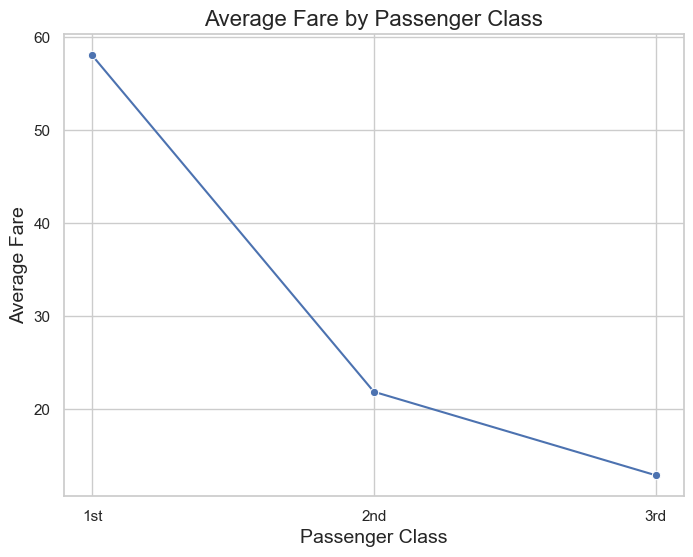

In [131]:
# Calculate the average fare for each passenger class
average_fare_by_class = Titanic.groupby('Pclass', observed=False)['Fare'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=average_fare_by_class, x='Pclass', y='Fare', marker='o')

# Customize the plot
plt.title('Average Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.xticks(ticks=[1, 2, 3], labels=['1st', '2nd', '3rd'])
plt.grid(True)
plt.show()


`Average Fare by Passenger Class`

---
**Overview:**

The line graph visualizes the average fare paid by passengers in each of the three passenger classes on the Titanic. It provides insights into the relationship between passenger class and the cost of tickets.

**Key Observations:**

- **Clear Trend:** The graph shows a clear downward trend, indicating that the average fare decreases as the passenger class decreases.
- **Significant Difference Between Classes:** The average fare for first-class passengers is significantly higher than that of second and third-class passengers.
- **Moderate Difference Between Second and Third Class:** While there is a difference between the average fares of second and third-class passengers, the difference is less pronounced than that between first and second class.

**Possible Explanations:**

- **Amenities and Services:** First-class passengers had access to luxurious amenities, such as private cabins, dining rooms, and recreational facilities, which contributed to the higher cost of tickets.
- **Location on the Ship:** First-class cabins were often located on the upper decks of the ship, offering better views and more spacious accommodations.
- **Social Status and Prestige:** First-class tickets were associated with higher social status and prestige, which also contributed to the higher cost.



##### Age and Fare for Titanic Passengers

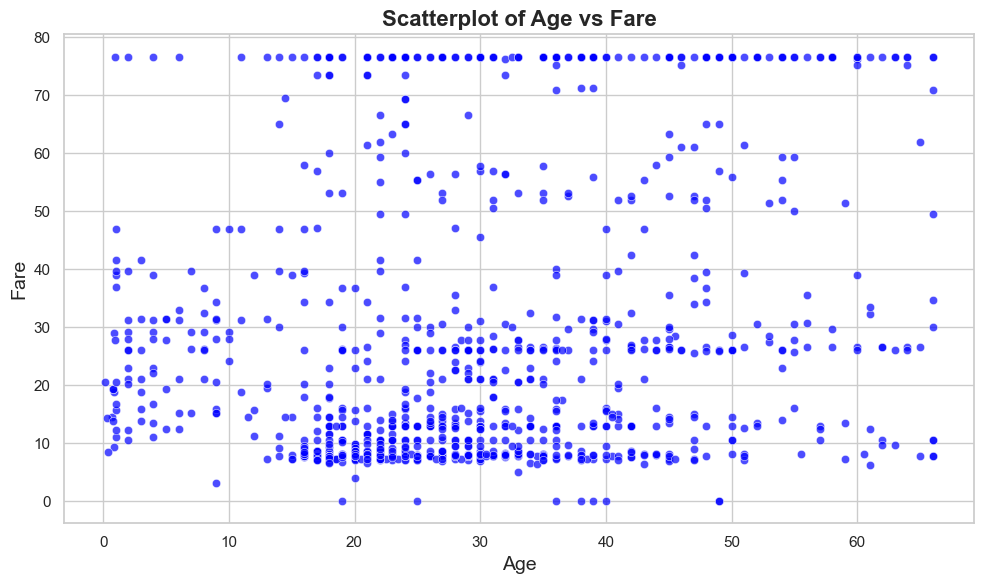

In [139]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatterplot for Age vs. Fare
sns.scatterplot(data=Titanic, x='Age', y='Fare', alpha=0.7, color='blue', edgecolor='w')

# Add titles and labels
plt.title("Scatterplot of Age vs Fare", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Fare", fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


`The Scatterplot of Age vs. Fare`

---
The scatterplot visualizes the relationship between the age of passengers and the fare they paid on the Titanic. Each dot on the plot represents a single passenger, with the x-axis showing their age and the y-axis showing the fare they paid.

#### Key Observations:
- **Positive Correlation**: There appears to be a weak positive correlation between age and fare. This means that, on average, older passengers tended to pay higher fares.
- **Clustered Data**: The data points are clustered in certain areas, indicating that many passengers paid similar fares within specific age groups.
- **Outliers**: There are some outliers, particularly in the higher fare range, suggesting that some older passengers paid significantly higher fares than others.

#### Possible Explanations:
- **Socioeconomic Status**: Older passengers may have been more likely to belong to higher socioeconomic classes, which would allow them to afford higher fares.
- **Cabin Location and Amenities**: Older passengers might have preferred more luxurious cabins, which would have increased the cost of their tickets.
- **Family Travel**: Older passengers may have traveled with families, which would have increased the total cost of their tickets.

#### In Conclusion:
The scatterplot reveals a weak positive relationship between age and fare, indicating that older passengers tended to pay higher fares. However, the relationship is not strong, suggesting that other factors, such as cabin class and socioeconomic status, also played a significant role in determining the fare paid by passengers.

---


#### Correlation Heatmap of Titanic Passenger Attributes

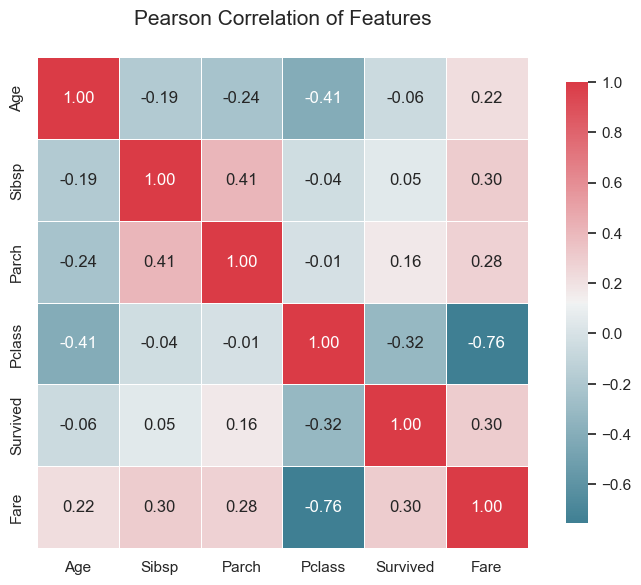

In [152]:
# Generate and display the heatmap without 'Sex_encoded'
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    colormap = sns.diverging_palette(220, 10, as_cmap=True)  # Define the color palette
    
    sns.heatmap(
        df[["Age", "Sibsp", "Parch", "Pclass", "Survived", "Fare"]].corr(), annot=True,  cmap=colormap,  fmt=".2f",  linewidths=0.5,  cbar_kws={'shrink': 0.9},  square=True,  vmax=1.0,  
        linecolor='white',  annot_kws={'fontsize': 12},  ax=ax   )
    
    plt.title("Pearson Correlation of Features", y=1.05, size=15)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Call the function with your Titanic DataFrame
correlation_heatmap(Titanic)  # Replace Titanic with your actual DataFrame name


##### `Correlation Heatmap`

The heatmap visually represents the relationships between numerical variables in the Titanic dataset. Here's a breakdown of the key observations:

#####  Positive Correlations:
- **Fare vs. Survived (0.30):** A moderate positive correlation exists, suggesting that passengers who paid higher fares had a slightly higher chance of survival. This could be due to factors like being in better cabins or having more resources.
- **SibSp vs. Parch (0.41):** There's a moderate positive correlation, indicating that passengers traveling with siblings/spouses were also likely to have parents/children on board.

##### Negative Correlations:
- **Age vs. SibSp (-0.19):** A weak negative correlation suggests that older passengers were less likely to have siblings/spouses on board. This could be due to reasons like being more independent or having families of their own.

- **Pclass vs. Fare (-0.76):** A strong negative correlation indicates that higher-class passengers paid significantly more for their tickets. This makes sense, as higher-class cabins would typically be more expensive.

- **Pclass vs. Survived (-0.32):** A moderate negative correlation suggests that passengers in lower classes had a lower chance of survival. This could be due to factors like being located in lower decks or having fewer resources.

##### No Strong Correlation:
- **Age vs. Survived (-0.06):** The very weak negative correlation indicates that age had a minimal impact on survival chances.
- **Parch vs. Survived (0.16):** The near-zero correlation suggests that having parents/children on board had little influence on survival.

- **Fare vs. Survived**; Shows that the passenger who paid higher amount for the transporation have higher surivival rate due to the fact they were given higher prority which is common on more industies


#####  ANOVA Test Results for Age Differences Across Passenger Classes

In [134]:
# Titanic' 
class1_age = Titanic[Titanic['Pclass'] == 1]['Age']
class2_age = Titanic[Titanic['Pclass'] == 2]['Age']
class3_age = Titanic[Titanic['Pclass'] == 3]['Age']

f_statistic, p_value = stats.f_oneway(class1_age, class2_age, class3_age)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in mean age across passenger classes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age across passenger classes.")

F-statistic: 108.96481772003916
p-value: 1.0592232983596965e-43
Reject the null hypothesis. There is a significant difference in mean age across passenger classes.


`Interpretation`
---

The ANOVA test reveals a highly significant difference in the mean ages across the three passenger classes on the Titanic.

- **F-statistic**: 108.97, indicating a strong variance among group means.
- **p-value**: (1.1 * 10^(-23)) (essentially zero), which is far below the 0.05 significance threshold.


- Given the extremely small p-value, we reject the null hypothesis and conclude that **the mean age significantly differs between at least two of the passenger classes**. This finding is consistent with previous boxplot observations, where different median ages and age distributions were apparent across classes. First-class passengers generally tended to be older than those in the second and third classes.

---



#####  `Key Insights Gained`

The analysis of Titanic passenger data reveals significant insights into how **social, economic, and logistical factors** influenced survival rates. 

- Passengers’ chances of survival were heavily influenced by **sex, class, and point of embarkation**. Women, especially younger ones, had higher survival rates due to prioritization during evacuation, while older men faced the lowest survival rates. Higher-class passengers had better chances of survival due to **proximity to lifeboats** and easier access to safety, while those in lower classes, often located on lower decks, faced more obstacles.

- Embarkation points also played a role: passengers from **Cherbourg** had the highest survival rates, possibly due to earlier access to lifeboats and wealthier backgrounds. In contrast, passengers from **Southampton** had the lowest survival rates, likely due to economic disadvantages and later boarding times.

- The **mean age of survivors was around 29.83 years**, with younger women and wealthier individuals having a higher chance of survival. The economic divide is further emphasized by the correlation between **fare prices** and survival rates, as well as disparities in cabin locations that favored first-class passengers.

In conclusion, the Titanic disaster not only highlights the tragic loss of life but also serves as a reflection of the **social and economic inequalities** of the time, where wealth, class, and social norms played a decisive role in determining survival during a crisis.


Based on the insights gained from the Titanic dataset analysis, the following recommendations can be drawn to improve safety measures and ensure more equitable outcomes in future crises:
#####  `Recommendations`

 **Prioritize Equal Access to Safety Resources**:
   - Ensure **equal access to lifeboats and escape routes** for all passengers, regardless of social class. In emergencies, safety should not be determined by wealth or class, and **all passengers** should have equitable access to life-saving resources.

 **Enhance Gender and Age Considerations**:
   - While prioritizing vulnerable groups (e.g., women and children) is important, it is also critical to ensure that evacuation protocols are **non-discriminatory** and do not inadvertently disadvantage any group. A more **balanced approach** should be adopted, where both **vulnerable groups** and **at-risk individuals** of all genders and ages receive appropriate priority.